In [10]:

!pip install pandas scikit-learn
!pip install numpy
!pip install openai
!pip install sentence-transformers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers==4.45.1
!pip install sentence-transformers==3.0.1





Looking in indexes: https://download.pytorch.org/whl/cpu
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.9 MB 18.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 12.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 9.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 7.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 6.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.0 MB/s  0:00:01
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.4 MB 6.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.

  You can safely remove it manually.


  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 5.1.2
    Uninstalling sentence-transformers-5.1.2:
      Successfully uninstalled sentence-transformers-5.1.2


In [23]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import timeit
import matplotlib.pyplot as plt







In [24]:

data = {
    'product_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'product_name': [
        'Floral Summer Dress',
        'Denim Jacket',
        'Formal White Shirt',
        'Black Leather Boots',
        'Bridesmade look',
        'Boho Dress',
        'Street Hoodie',
        'Cozy Winter Sweater'
    ],
    'description': [
        'Lightweight floral dress perfect for summer and beach days',
        'Classic blue denim jacket for casual and trendy looks',
        'Crisp formal white shirt ideal for office and business wear',
        'Stylish black leather boots suitable for winter and parties',
        'Designer Lehengas, Saree, handwork, elegant, beautiful bride',
        'Flowy boho dress with earthy tones for festival vibes',
        'Bold urban oversized hoodie for an energetic look',
        'Warm knitted sweater to stay cozy during cold weather'
    ]
}

products = pd.DataFrame(data)

vectorizer = TfidfVectorizer(stop_words='english')
embeddings = vectorizer.fit_transform(products['description'])

def vibe_matcher(query, top_n=3):
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, embeddings).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = products.iloc[top_indices][['product_name', 'description']]
    print(f"\nQuery: '{query}'\n")
    for _, row in results.iterrows():
        print(f"{row['product_name']} — {row['description']}\n")

vibe_matcher("colourful dress")
vibe_matcher("traditional")
vibe_matcher("bridesmaid")



Query: 'colourful dress'

Boho Dress — Flowy boho dress with earthy tones for festival vibes

Floral Summer Dress — Lightweight floral dress perfect for summer and beach days

Street Hoodie — Bold urban oversized hoodie for an energetic look


Query: 'traditional'

Cozy Winter Sweater — Warm knitted sweater to stay cozy during cold weather

Street Hoodie — Bold urban oversized hoodie for an energetic look

Boho Dress — Flowy boho dress with earthy tones for festival vibes


Query: 'bridesmaid'

Cozy Winter Sweater — Warm knitted sweater to stay cozy during cold weather

Street Hoodie — Bold urban oversized hoodie for an energetic look

Boho Dress — Flowy boho dress with earthy tones for festival vibes




Query: 'comfortable winter outfit'

Black Leather Boots — Stylish black leather boots suitable for winter and parties

Cozy Winter Sweater — Warm knitted sweater to stay cozy during cold weather

Boho Dress — Flowy boho dress with earthy tones for festival vibes

Query 'comfortable winter outfit' took 0.0214 seconds

Query: 'summer beach wear'

Floral Summer Dress — Lightweight floral dress perfect for summer and beach days

Formal White Shirt — Crisp formal white shirt ideal for office and business wear

Cozy Winter Sweater — Warm knitted sweater to stay cozy during cold weather

Query 'summer beach wear' took 0.0097 seconds

Query: 'party look with boots'

Street Hoodie — Bold urban oversized hoodie for an energetic look

Black Leather Boots — Stylish black leather boots suitable for winter and parties

Boho Dress — Flowy boho dress with earthy tones for festival vibes

Query 'party look with boots' took 0.0061 seconds

Query: 'casual office wear'

Formal White Shirt — Crisp formal 

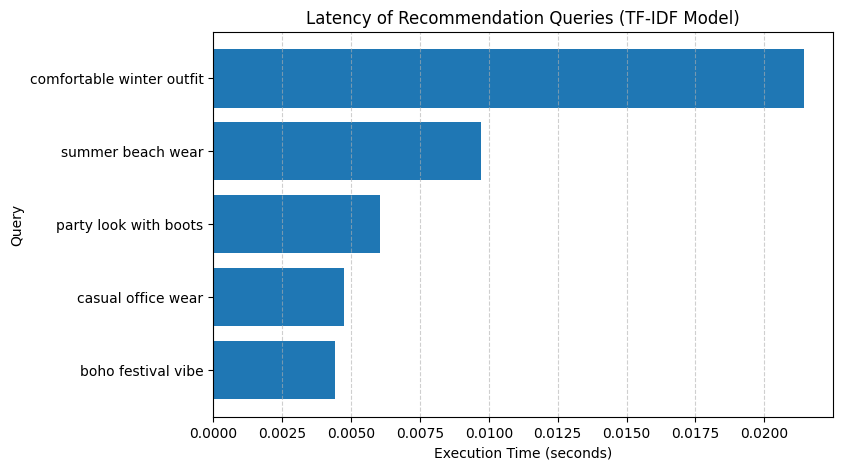

In [25]:
queries = [
    "comfortable winter outfit",
    "summer beach wear",
    "party look with boots",
    "casual office wear",
    "boho festival vibe"
]

# Measure latency
latencies = []

for q in queries:
    exec_time = timeit.timeit(lambda: vibe_matcher(q), number=1)
    latencies.append(exec_time)
    print(f"Query '{q}' took {exec_time:.4f} seconds")

# Plot latency
plt.figure(figsize=(8, 5))
plt.barh(queries, latencies)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Query")
plt.title("Latency of Recommendation Queries (TF-IDF Model)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()